# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

In [1]:
import os 
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
img_list = os.listdir('./dataset')

['image_0008.jpg', 'image_0009.jpg', 'image_0007.jpg', 'image_0006.jpg', 'image_0004.jpg', 'image_0010.jpg', 'image_0005.jpg', 'image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg']


1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

In [242]:
def get_adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def plot(img, name_plot):
    plt.subplot(121),plt.imshow(img),plt.title(name_plot)
    plt.xticks([]), plt.yticks([])
    plt.show()

def data_augmentation(img):
    img = cv2.imread(f'./dataset/{img}')
    inverted_pixel = np.invert(img)
    adjust_gamma = get_adjust_gamma(img)
    blur = cv2.blur(img,(5,5))
    
    shape = img.shape
    height = shape[0]
    width = shape[1]
    M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
    rotate_90 = cv2.warpAffine(img, M90, (width, height))
    
    
    M_hor = np.float32([[1, 0, width/2], [0, 1, 0]])
    img_trhor = cv2.warpAffine(img, M_hor, (width, height))

    M_sk1 = np.float32([[1,1,1], [0,1,1]])
    sk1 = cv2.warpAffine(img, M_sk1, (width, height))
    
    img_vertical_flip = cv2.flip(img, 0)
    img_horizontal_flip = cv2.flip(img, 1)
    
    images = [img, inverted_pixel, adjust_gamma, blur, img_vertical_flip, 
              img_horizontal_flip, img_trhor]
    name_images = ['Original', 'Inverted', 'Adjust', 'Blur', 
                    'Vertical flip', 'Horizontal flip' 'Move']

    for i, name in zip(images, name_images) :
        plot(i, name)
    plot(rotate_90,  'Rotate 90')
    plot(sk1,  'Change angle')
    

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

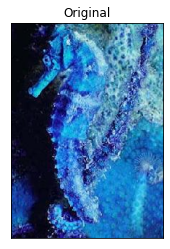

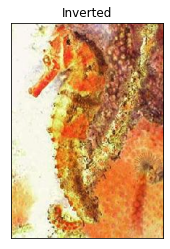

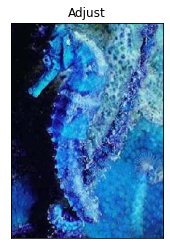

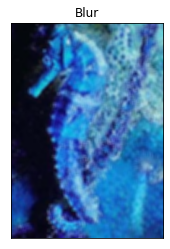

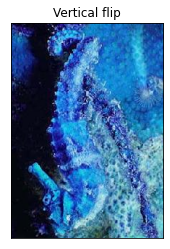

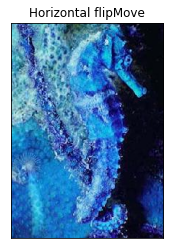

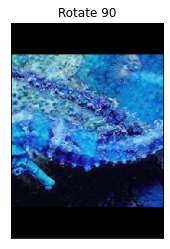

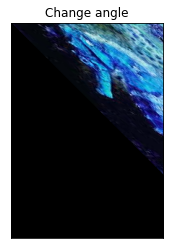

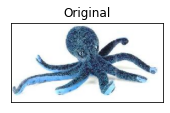

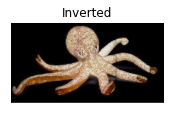

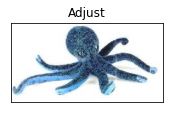

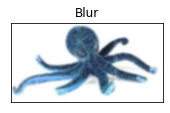

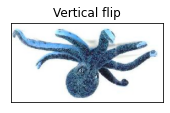

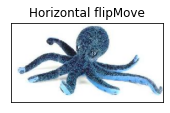

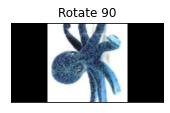

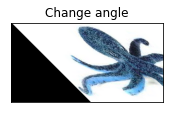

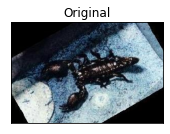

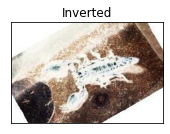

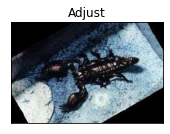

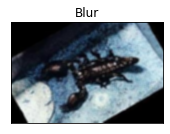

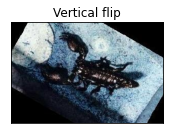

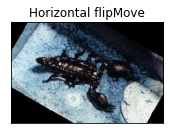

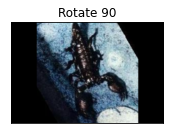

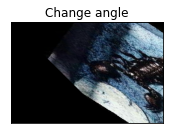

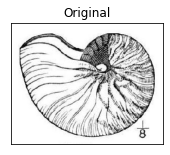

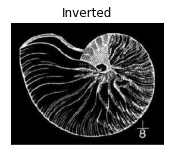

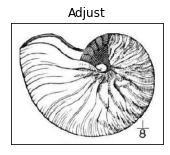

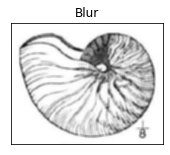

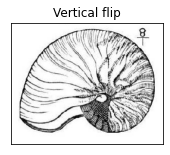

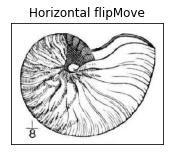

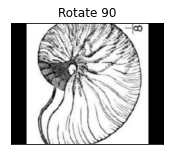

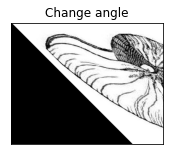

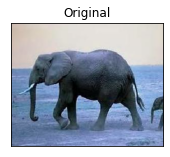

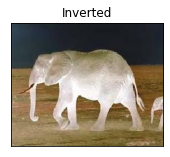

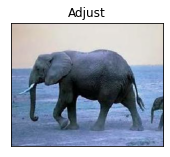

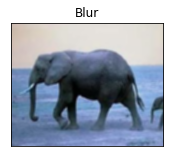

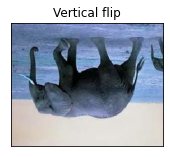

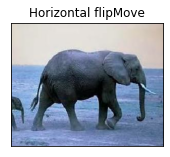

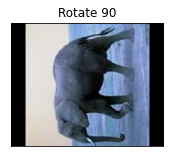

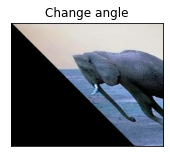

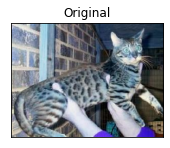

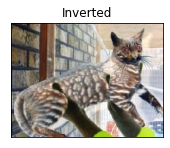

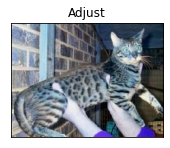

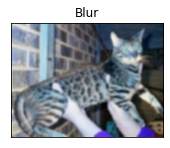

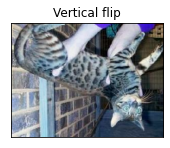

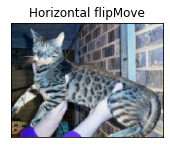

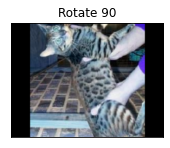

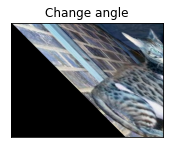

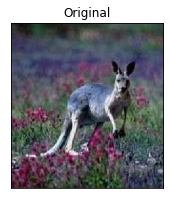

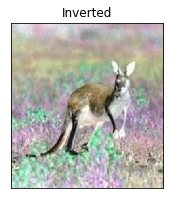

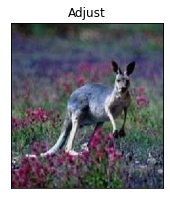

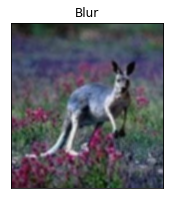

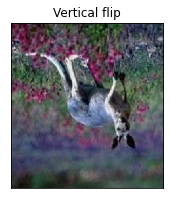

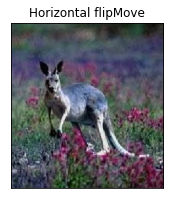

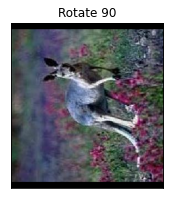

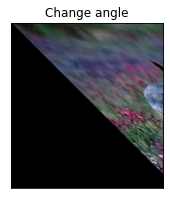

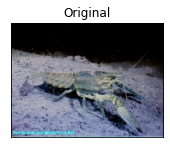

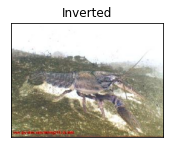

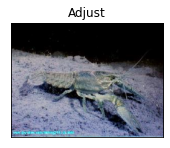

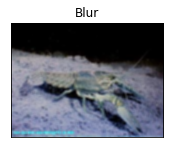

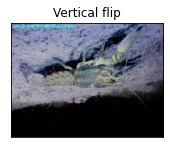

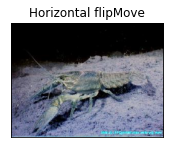

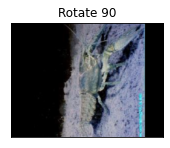

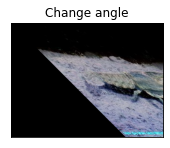

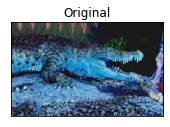

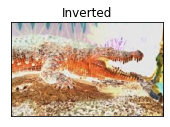

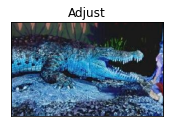

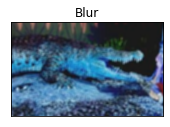

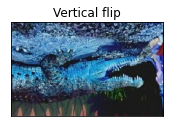

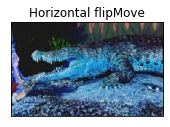

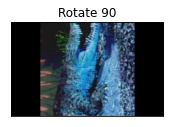

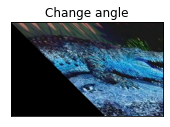

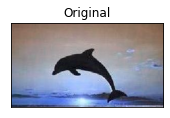

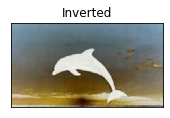

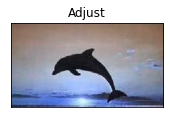

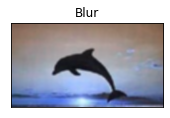

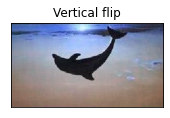

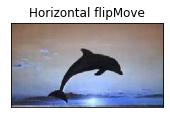

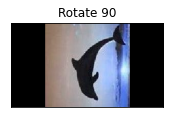

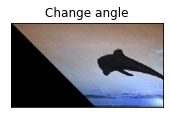

In [243]:
for img in img_list:
    data_augmentation(img)

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки
<table><tr>
<td> <img src="./test_img.jpg" height="300" width="300"> </td>

</tr></table>

2.1. Відкрити та завантажити наступне зображення:
    * assignments/test_img.jpg

In [227]:
img = cv2.imread(f'./test_img.jpg')

2.2 Задати розмір вихідного зображення:

In [228]:
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

2.3 Задати координати ROI вхідного зображення: 

In [229]:
src = np.float32([[900,600], [1000, 500], [200, 500],[400,600]])

2.4 Задати координати ROI вихідного зображення: 

In [230]:
dst = np.float32([[0, 1000],[0,0],[1000,0], [1000, 1000]])

2.5 Визначити матрицю перетворення перспективи

In [231]:
M = cv2.getPerspectiveTransform(src, dst)

2.6 Виконати перетворення перспективи 

In [232]:
wraped_img = cv2.warpPerspective(img, M, (1000,1000))

2.7 Відобразити вихідне зображення

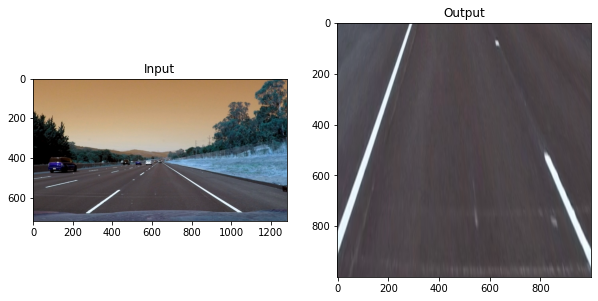

In [233]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(wraped_img),plt.title('Output')
plt.show()